# Pothole Detection with YOLOv5 (training)
- yolov5 model platform: https://github.com/ultralytics/yolov5
- for tutorial use of this yolov5 platform, see https://github.com/ultralytics/yolov5/blob/master/tutorial.ipynb
- example for Pothole detection:
  - from You-tube https://www.youtube.com/watch?v=fdWx3QV5n44
(1:09:12)


## Dataset download
- dataset in https://public.roboflow.com/object-detection/pothole
- 위 사이트에서 데이터를 Yolov5 for pytorch mode 로 다운받는다.

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15814 (delta 9), reused 26 (delta 2), pack-reused 15769
Receiving objects: 100% (15814/15814), 14.59 MiB | 27.77 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.


In [2]:
!pip install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.9/625.9 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00


In [3]:
%cd yolov5
!mkdir pothole

/content/yolov5


In [4]:
%cd /content/yolov5/pothole

/content/yolov5/pothole


In [ ]:
!curl -L "https://public.roboflow.com/ds/MUuXTYPPp0?key=uP4mgtHgJ5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
from glob import glob

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/valid/images/*.jpg')
print(len(train_img_list), len(test_img_list), len(valid_img_list))

In [6]:
from glob import glob

train_img_list = glob("/content/yolov5/pothole/train/images/*.jpg")
test_img_list = glob("/content/yolov5/pothole/test/images/*.jpg")
valid_img_list = glob("/content/yolov5/pothole/valid/images/*.jpg")
print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 67 133


In [7]:
import yaml

with open('/content/yolov5/pothole/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
with open('/content/yolov5/pothole/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')
with open('/content/yolov5/pothole/valid.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')

In [8]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [9]:
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [10]:
%%writetemplate /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [11]:
%cat /content/yolov5/pothole/data.yaml


train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']


# 모델 구성

In [12]:
import yaml

with open('/content/yolov5/pothole/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [13]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [14]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

## Training
- img: 입력 이미지 크기
- batch
- epochs
- data: yaml 파일 경로
- cfg: 모델 구성 지정 (network structure and weights)
- weights: 가중치에 대한 경로 지정
- name: 결과 이름
- nosave: 최종 체크포인트만 지정
- cache: 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 100 --data ./pothole/data.yaml \
  --cfg ./models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pothole/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pothome_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# 결과 보기
!ls /content/yolov5/runs/train/pothole_results/

confusion_matrix.png				    results.png
events.out.tfevents.1672979270.936ae2679bd6.2927.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


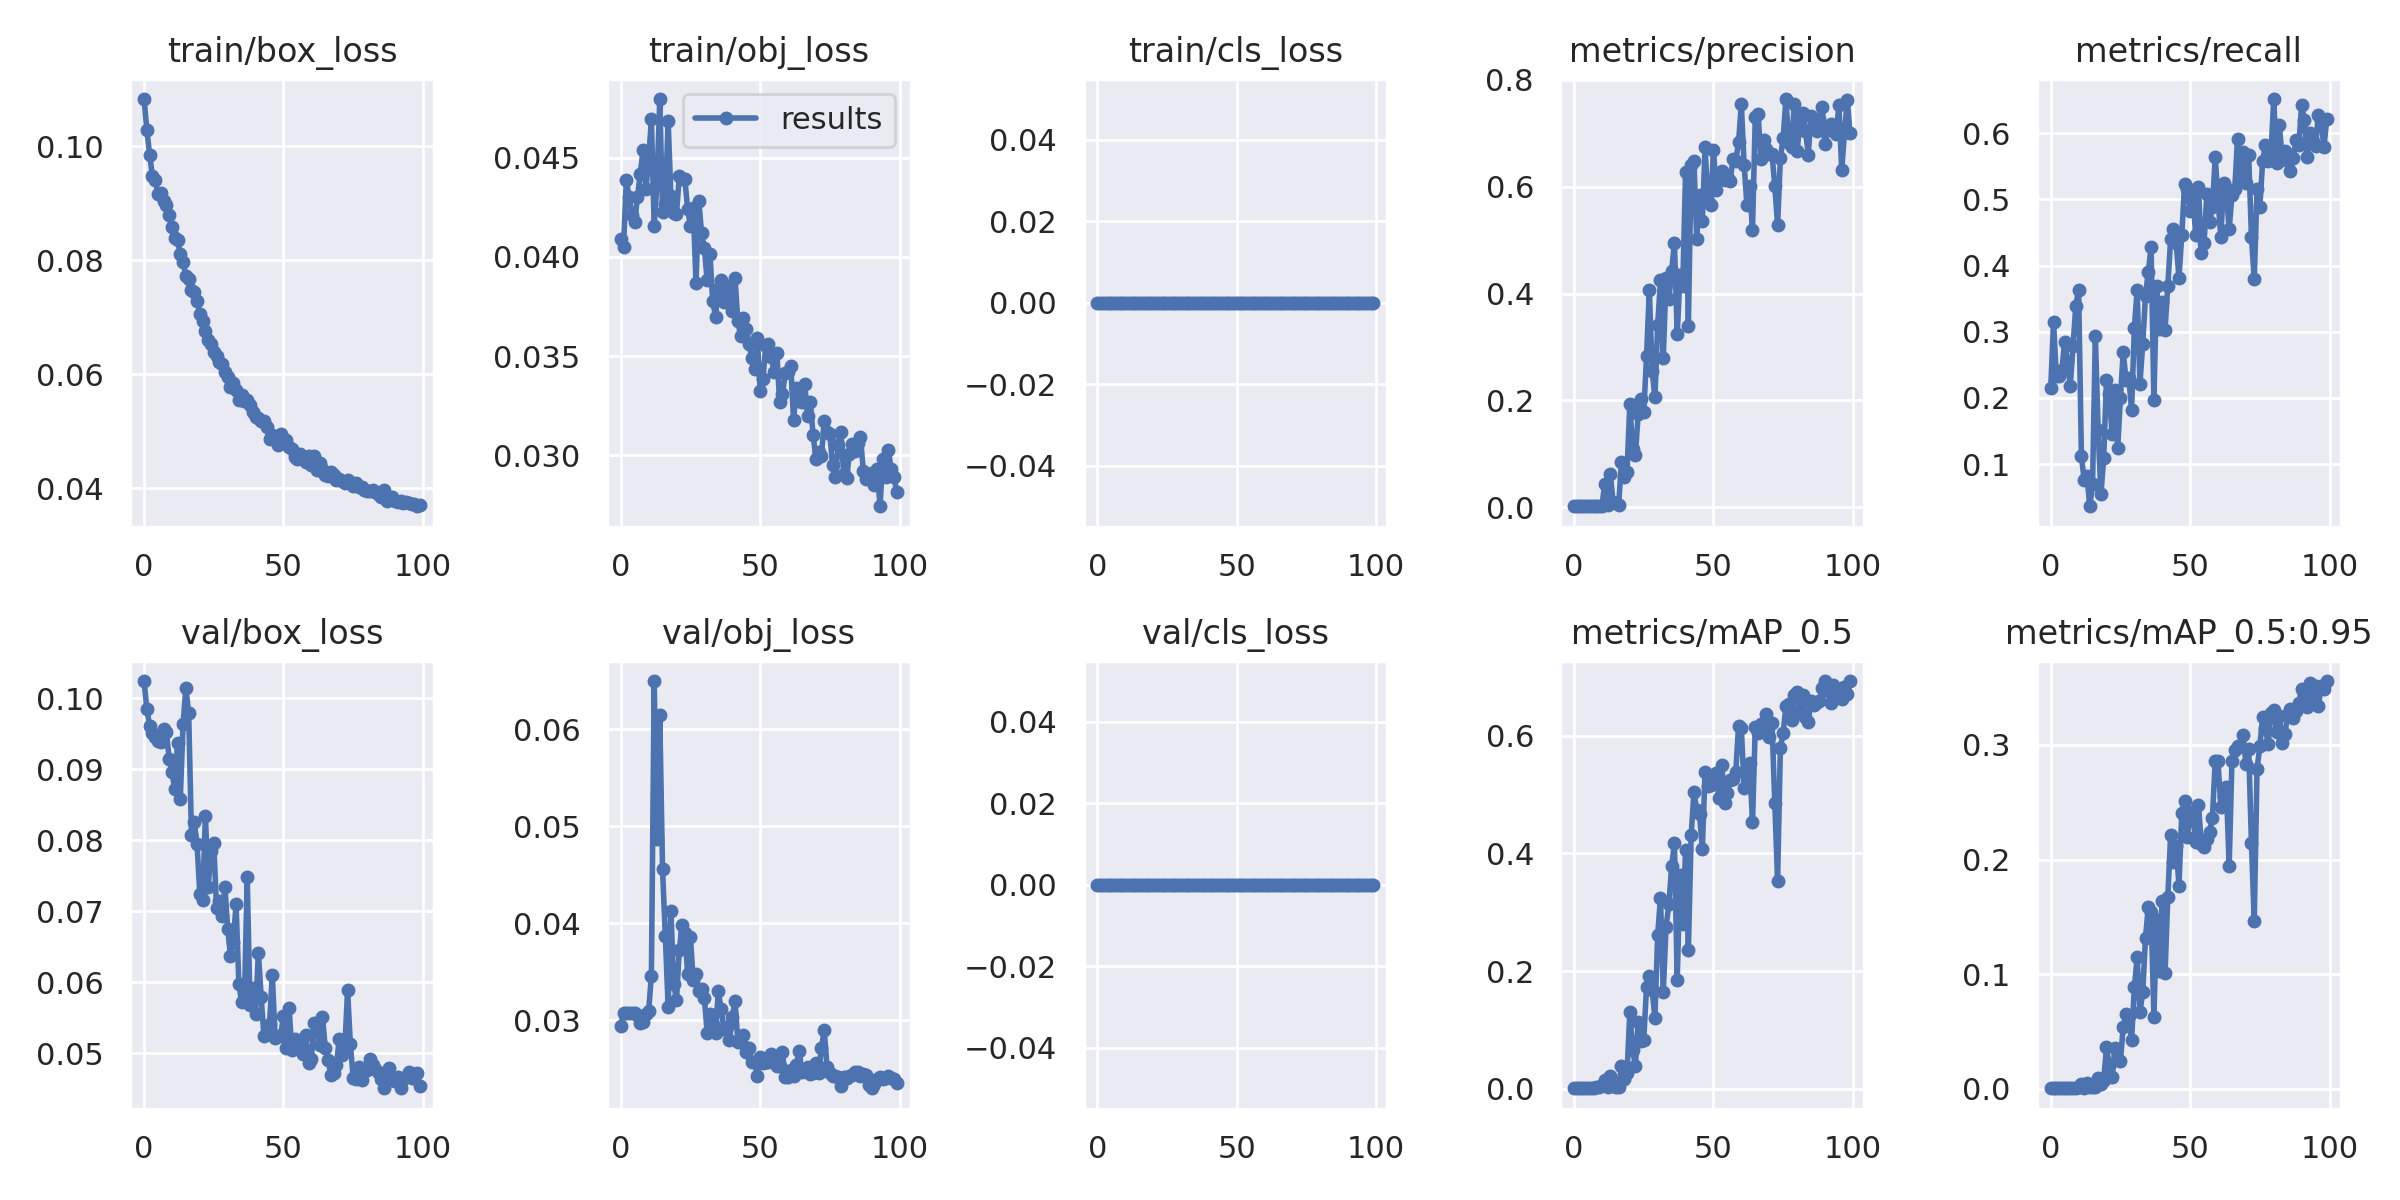

In [ ]:
from IPython.display import Image, display
Image(filename='/content/yolov5/runs/train/pothole_results/results.png', width=1000)

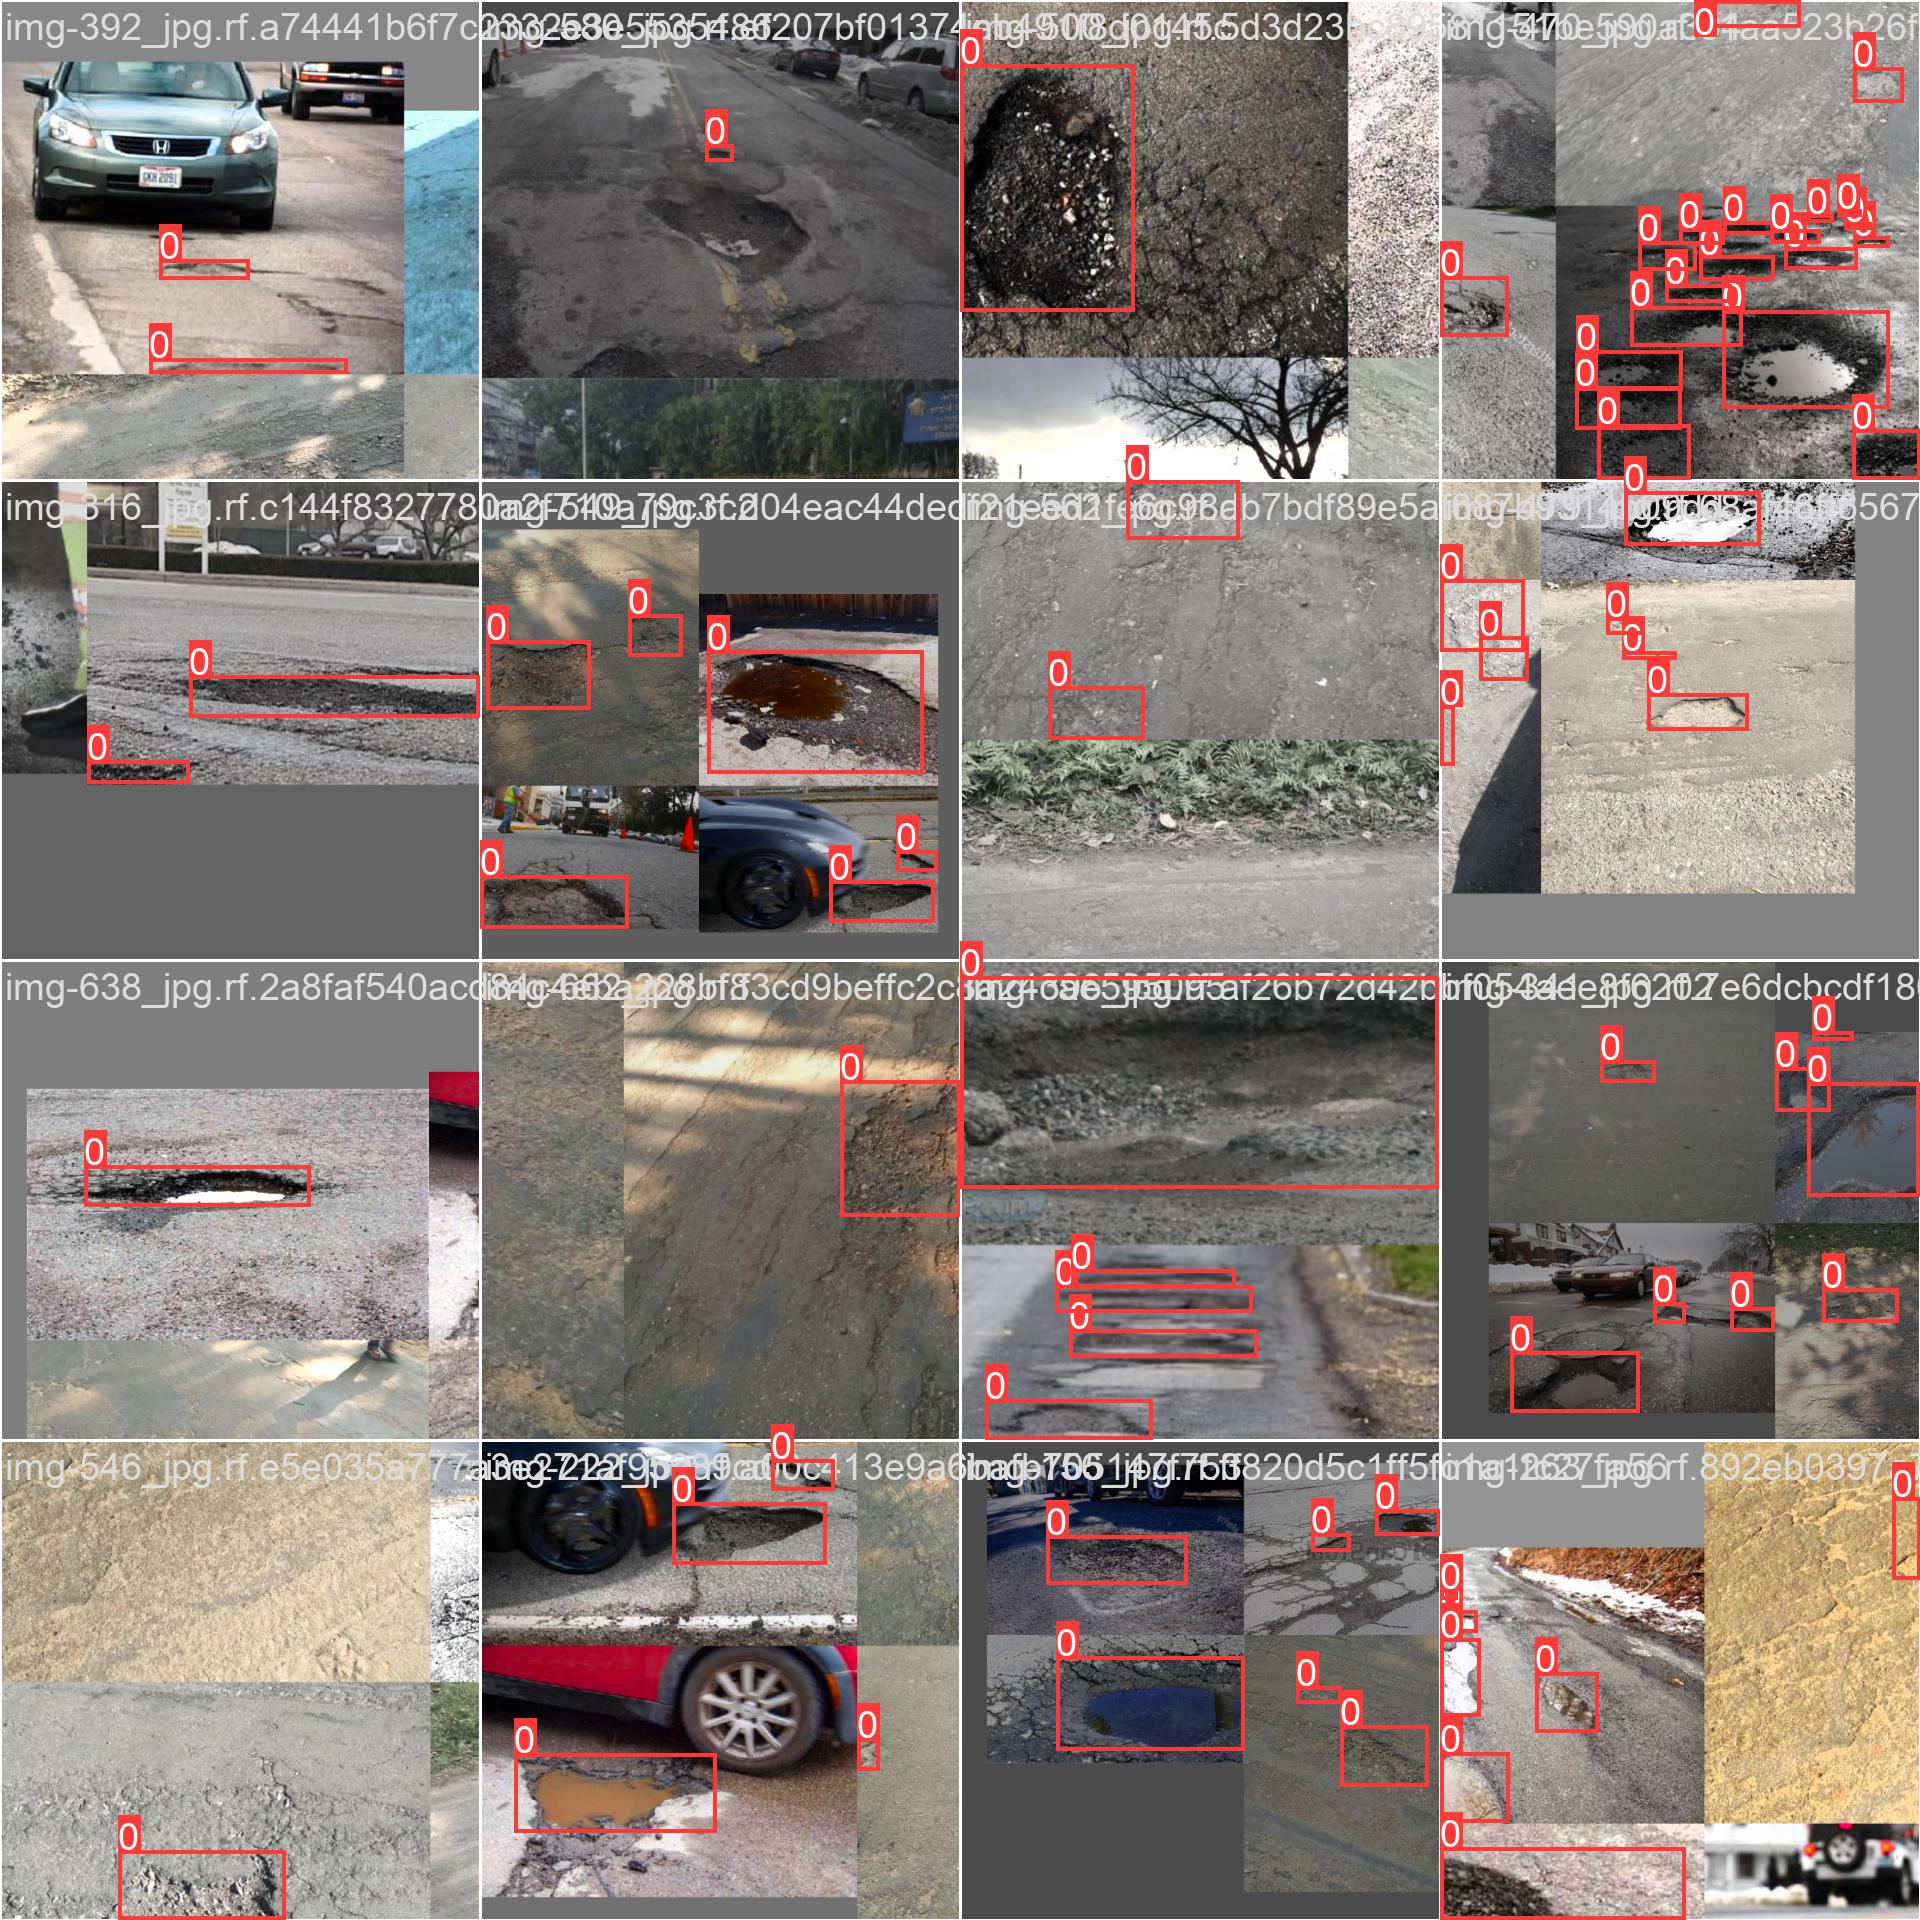

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch0.jpg', width=1000)

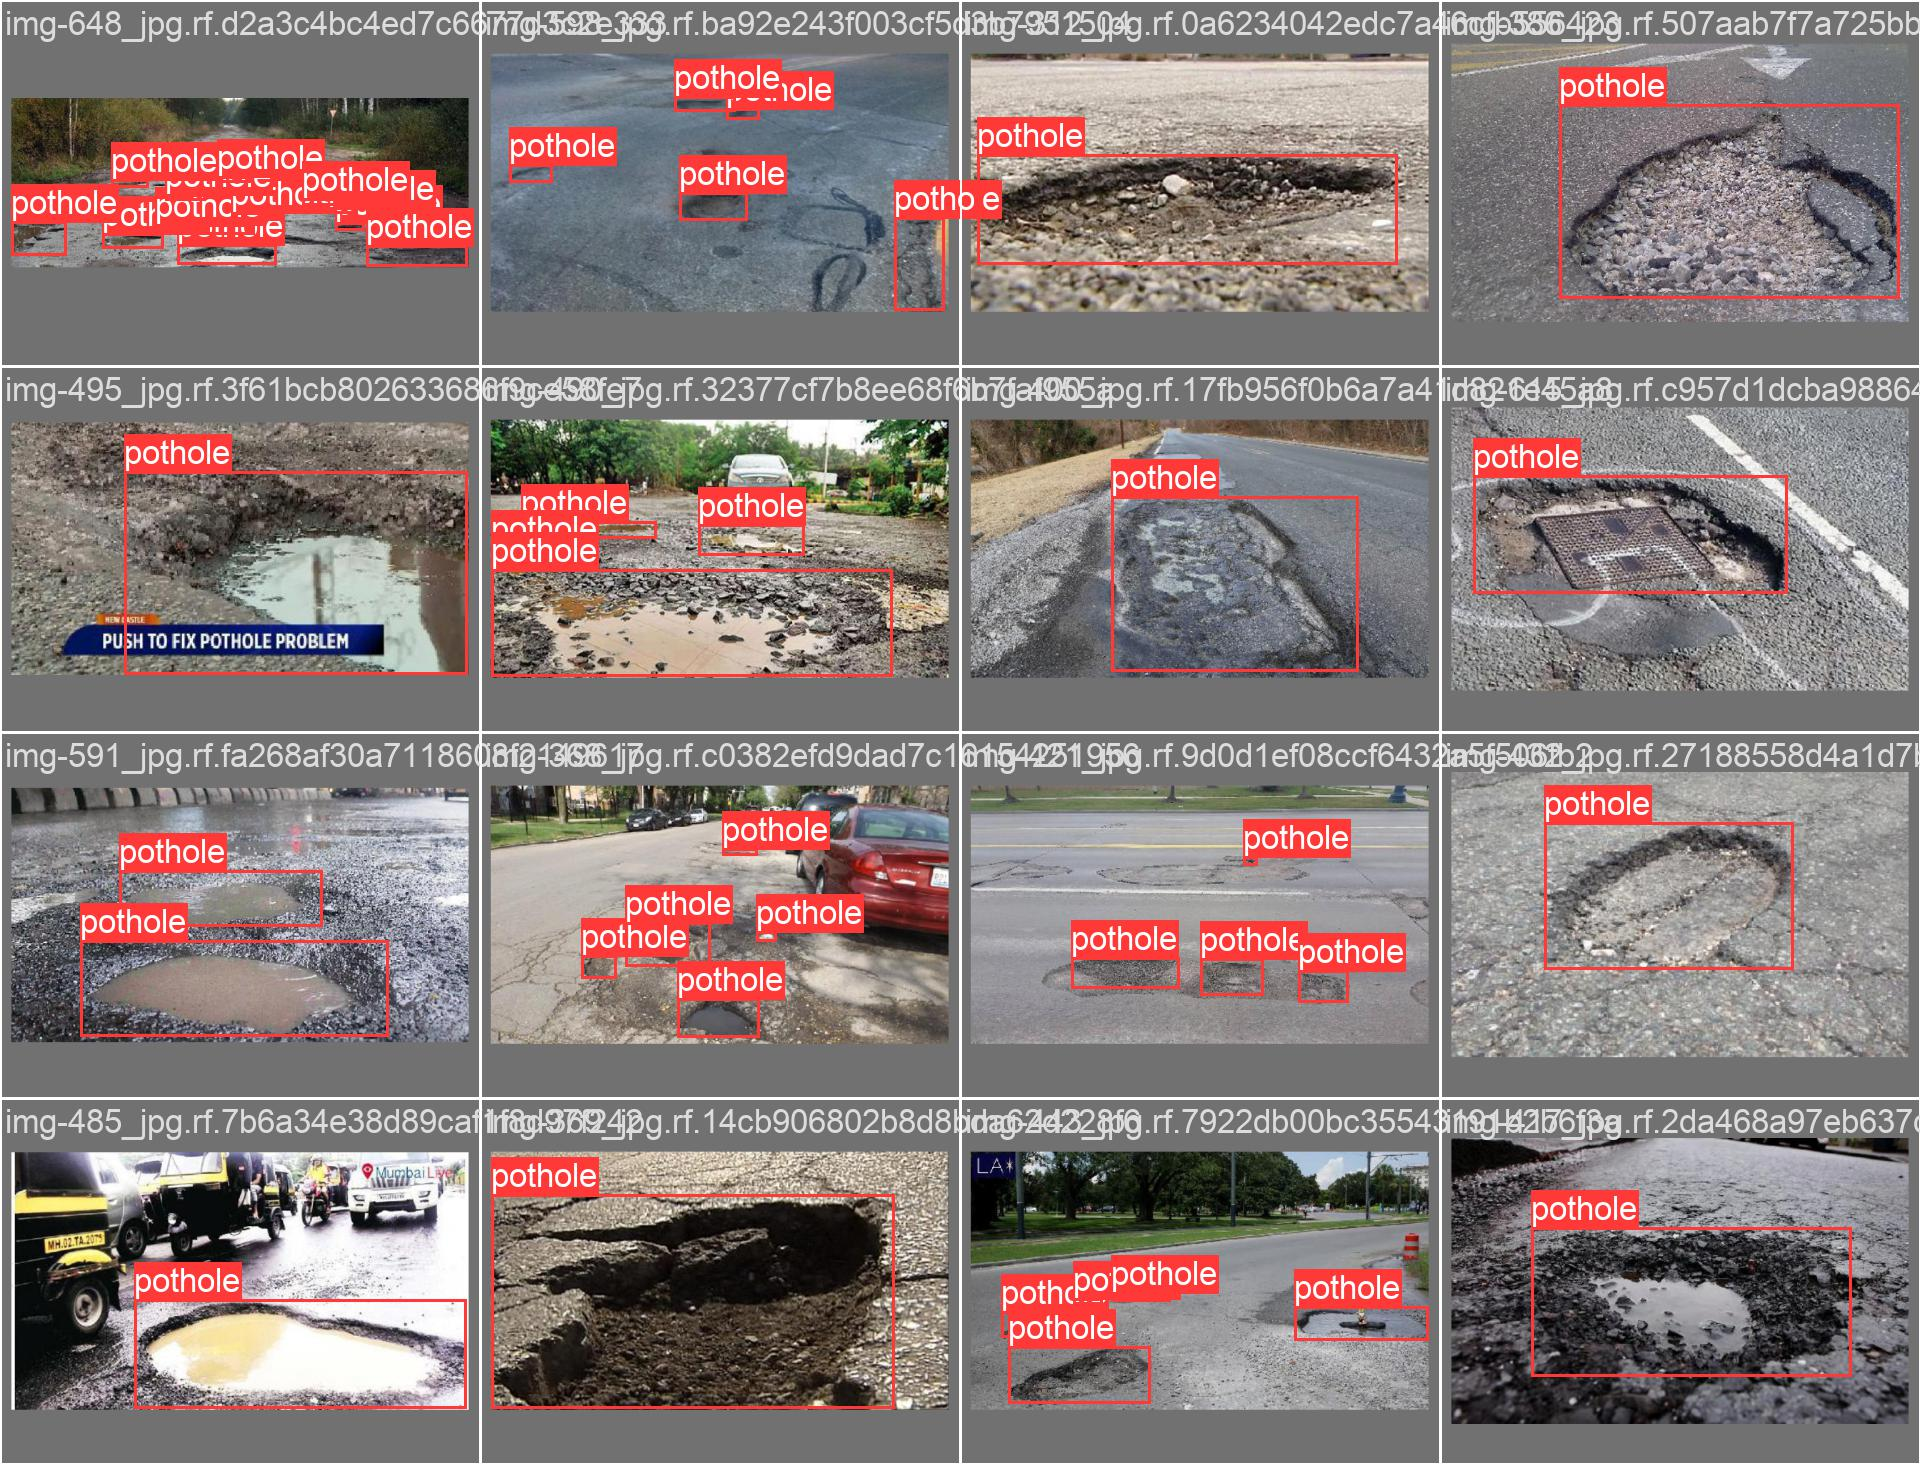

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/val_batch0_labels.jpg', width=1000)

## Validation

In [ ]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --iou 0.65 --half

val: data=./pothole/data.yaml, weights=['runs/train/pothome_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pothole/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.10it/s]
                   all        133        330      0.715      0.608      0.687      0.357
Speed: 0.2ms pre-process, 9.2ms inference, 2.8ms NMS per image at shape (32, 3, 640, 640)
Results sa

In [ ]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --task test

val: data=./pothole/data.yaml, weights=['runs/train/pothome_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/pothole/test/labels... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<00:00, 485.52it/s]
test: New cache created: /content/yolov5/pothole/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.19it/s]
                   all         67        154      0.781      0.636      0.697      0.373
Speed: 0.2ms pre-process, 8.7ms 

## 추론 (Prediction)


In [ ]:
%ls runs/train/pothole_results/weights

best.pt  last.pt


In [ ]:
!python detect.py --weights runs/train/pothole_results/weights/best.pt --img 640 --conf 0.4 --source ./pothole/test/images

detect: weights=['runs/train/pothome_results/weights/best.pt'], source=./pothole/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/67 /content/yolov5/pothole/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 1 pothole, 12.6ms
image 2/67 /content/yolov5/pothole/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 1 pothole, 12.6ms
image 3/67 /content/yolov5/pothole/test/images/img-146_jpg.rf.61be25b3053

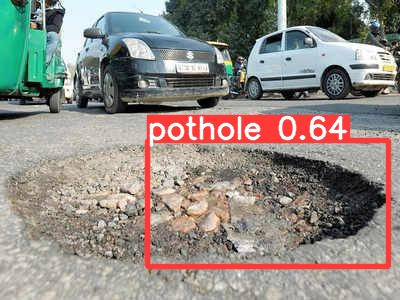

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

## 모델 내보내기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/U_MSAC_KPC

 gg_104_경사하강법.ipynb
 gg_105_당뇨병_기초_회귀_예측.ipynb
 gg_105_더미데이터_기초_분류_rev1.ipynb
 gg_106_결정트리_붓꽃_분류.ipynb
 gg_106_결정트리_유방암_분류.ipynb
 gg_115_MNIST_손글씨_인식_모델.ipynb
'gg_121_개선된_MNIST_손글씨_인식_모델_(CNN).ipynb'
 gg_122_CNN_이미지_분류_모델.ipynb
 gg_136_RNN_시계열_데이터_날씨_예측.ipynb
'gg_141_이미지_객체_인식_탐지_모델_1_(Faster_R-CNN).ipynb'
'gg_151_이미지_객체_인식_탐지_모델_2_(YOLOv3).ipynb'
'gg_161_동영상_객체_추적_모델_(YOLOv4,DeepSORT).ipynb'
 gg_93_OpenCV_손글씨_인식.ipynb
 gg_93_OpenCV_얼굴인식.ipynb
 gg_94_OpenCV_이미지_윤곽_추출.ipynb
 gg_94_OpenCV_우편번호_읽기.ipynb
 gg_95_OpenCV_동영상처리_rev1.ipynb


In [ ]:
# 훈련된 모델 저장
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/Colab\ Notebooks/U_MSAC_KPC

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/U_MSAC_KPC

 best.pt
 gg_104_경사하강법.ipynb
 gg_105_당뇨병_기초_회귀_예측.ipynb
 gg_105_더미데이터_기초_분류_rev1.ipynb
 gg_106_결정트리_붓꽃_분류.ipynb
 gg_106_결정트리_유방암_분류.ipynb
 gg_115_MNIST_손글씨_인식_모델.ipynb
'gg_121_개선된_MNIST_손글씨_인식_모델_(CNN).ipynb'
 gg_122_CNN_이미지_분류_모델.ipynb
 gg_136_RNN_시계열_데이터_날씨_예측.ipynb
'gg_141_이미지_객체_인식_탐지_모델_1_(Faster_R-CNN).ipynb'
'gg_151_이미지_객체_인식_탐지_모델_2_(YOLOv3).ipynb'
'gg_161_동영상_객체_추적_모델_(YOLOv4,DeepSORT).ipynb'
 gg_93_OpenCV_손글씨_인식.ipynb
 gg_93_OpenCV_얼굴인식.ipynb
 gg_94_OpenCV_이미지_윤곽_추출.ipynb
 gg_94_OpenCV_우편번호_읽기.ipynb
 gg_95_OpenCV_동영상처리_rev1.ipynb


# Exercise
- see the difference between json, xml, and yaml at https://rfriend.tistory.com/540

In [ ]:
%%writefile vegetables.yml
Vegetables:
  - pepper
  - tomato
  - garlic

Writing vegetables.yml


In [ ]:
import yaml

with open('vegetables.yml') as f:
    vegetables = yaml.load(f, Loader=yaml.FullLoader)
    print(vegetables)

{'Vegetables': ['pepper', 'tomato', 'garlic']}


In [ ]:
yaml.dump(vegetables)

'Vegetables:\n- pepper\n- tomato\n- garlic\n'

In [ ]:
from glob import glob
glob('/content/yolov5/*.py')

['/content/yolov5/export.py',
 '/content/yolov5/val.py',
 '/content/yolov5/benchmarks.py',
 '/content/yolov5/hubconf.py',
 '/content/yolov5/detect.py',
 '/content/yolov5/train.py']